# Introduction to Audio and Image Processing

You were introduced to Jupyter notebooks in the previous section. We will continue to use notebooks.

This lab is an introduction to audio and image processing. You will be learning how to use some Python packages that are commonly used in these domains. Part 1 deals will audio, and part 2 will be on images. There are 6 exercises in total. Make sure you attempt all of them.

Name: Young Bin Jo

NetID: yjo10

### Necessary packages

- scipy
- matplotlib
- numpy
- IPython

If you are using Canopy or Anaconda, you wouldn't need any additional packages for this lab. If needed, you can install packages using `pip install` or `conda install` depending on your environment.



### Load the relevant libraries

In [3]:
import numpy as np
import os
from __future__ import print_function
from scipy.io import wavfile
from matplotlib import pyplot as plt
from IPython.display import Audio

%matplotlib inline

# Part 1 - Audio

Sound is very small pressure changes in the medium it it travelling in, this pressure change is measured by a microphone and converted into signal levels. The most direct way to visualize this captured information is to plot out these values directly:

#### 1. Load the wav file

In [41]:
audio_file = 'data/italian.wav'
Fs, wav = wavfile.read(audio_file)

print('Length of audio signal: ' + str(wav.shape))
print(type(wav))

Length of audio signal: (870240,)
<class 'numpy.ndarray'>


#### 2. Listen to the the audio 

In [5]:
Audio(audio_file)

#### 3. Plot the audio signal

Text(0.5,1,'Italian speech')

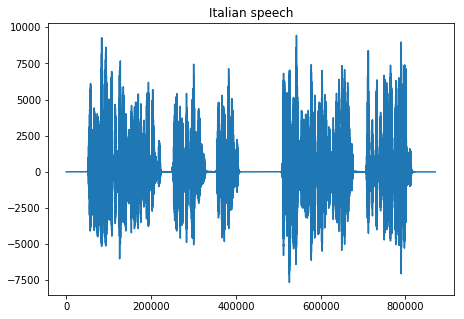

In [6]:
fig = plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(wav);
plt.title('Italian speech')

## <span style="color:blue">Exercise 1</span>
#### 1. Write a function to compute the length of the audio file in seconds
#### 2. Write a function to plot out a short section of the audio clip instead of the whole length

In [7]:
### Solution 

def audioLength(signal, sampling_rate):
    '''
        Given an input signal and sampling rate, 
        compute the length of the audio file
        
        Args:
            signal: [ndarray] samples/single channel of audio file
            sampling_rate: [float] the sampling rate Fs of the signal
        Returns:
            duration: [float] value of the duration in seconds
        Hint: 
            Refer to the documentation of read() in scipy.io.wavefile
    '''        
    
    duration = len(signal) / sampling_rate
    return duration

def getWindow(signal, start, end, window_func=None):
    '''
        Given an input signal, extract a windowFunc-windowed 
        part of the signal from start to end times
        
        Args:
            signal: [ndarray] audio signal 
            start: [int] start index
            end: [int] end index
            window_func: [string] method to window the signal
        Returns:
            section: [ndarray] signal values from [start, end)
        Remark:
            1. Make sure to divide the selected section by its length 
               for normalization.
    '''

    if window_func == None:
        section = signal[start:end]
    return section

### Use the above functions to visualize the sound clip

Time length of audio file (in sec) 18.13


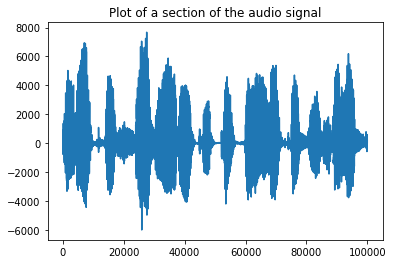

In [8]:
print('Time length of audio file (in sec)' , audioLength(wav, Fs))
plt.figure()
plt.title('Plot of a section of the audio signal')
plt.plot(getWindow(wav, 100000, 200000))
plt.show()

## Better Visualization

It is difficult to see what's happening in the audio signal from the plots above. To analyze audio content, in applications such as speaker recognition or audio content identification, a necessary tool is the **spectrogram**. The spectrogram can be used to visualize the frequency content of the audio signal as it progresses over time.

Mathematically, the spectrogram is the **squared-magnitude** of 
the Fourier transform of overlapping segments, or windows, of the audio signal.
To generate the spectrogram, the signal must first be separated into
overlapping segments. If we denote the signal as 
$\vec{x} = [x_{0}, x_{1},..., x_{N-1}]$, a one-dimensional vector of $N$ samples,
Then the segments would be given as
$$ 
\vec{x}_{0}=[x_{0}, x_{1},..., x_{N}],\\
\vec{x}_{1}=[x_{M}, x_{M+1},..., x_{M+N}],\\
\vdots\\
\vec{x}_{i}=[x_{iM}, x_{iM + 1},..., x_{iM+N}],
$$
where $M$ is the step size between windows
and $N$ is the length of each window. To generate a smoother spectrogram,
it is common to multiply the windows element-wise with a 
*windowing filter* $\vec{w}$. A popular choice of a window
filter is the Hamming window.

### Windowing Functions

Using hard cut-offs at the boundaries of the windows can cause various undesirable artifacts. In order to reduce these effects, windowing functions can be applied to these rectangular clips. Numpy provides `hamming()` to generate what is known as the Hamming window. We apply this window to the signal we obtained above by performing an elementwise multiplication.

Note: Not multiplying the signal by any fancy windowing function is called the rectangular window.

#### Visualizing the hamming window

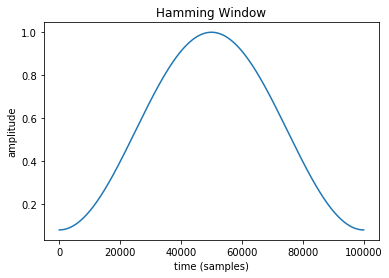

In [9]:
N = 200000 - 100000
w = np.hamming(N)      # generate a Hamming window of length N
s = wav[100000:200000] # how many samples does s have? N or N+1?

fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(w) # plot the window
ax.set_title('Hamming Window')
ax.set_xlabel('time (samples)')
ax.set_ylabel('amplitude')
plt.show()

## <span style="color:blue">Exercise 2</span>

Now modify the definition of your `getWindow()` function, it should now apply the *hamming* window to the signal that was obtained.

In [10]:
### Solution 

def getWindow(signal, start, end, window_func=None):
    '''
        Given an input signal, extract a windowFunc-windowed 
        part of the signal from start to end times
        
        Args:
            signal: [ndarray] audio signal 
            start: [int] start index
            end: [int] end index
            window_func: [string] method to window the signal
        Returns:
            section: [ndarray] signal values from [start, end)
        Hint:
            1. Generate a hamming window with the correct length
            2. Multiply your signal section with the hamming window
            3. Make sure to normalize the Hamming window to sum to 1
    '''
    if window_func == None:
        section = signal[start:end]
    elif window_func == 'hamming':
        section = signal[start:end] * np.hamming(end-start)
    else: 
        pass
    return section

### Visualize the windowed signal and compare with the original section (rectangular window)

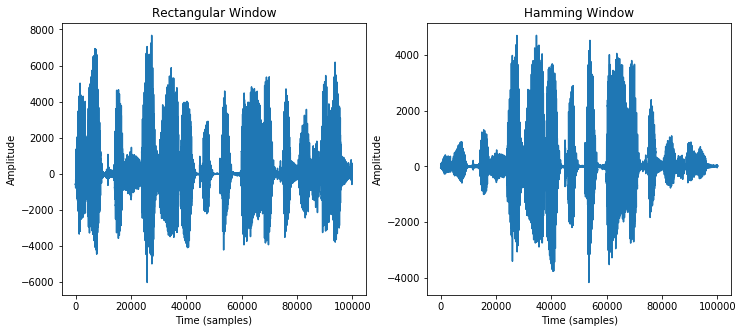

In [11]:
fig = plt.figure(figsize=(12, 5))  # create a figure object

ax = fig.add_subplot(1, 2, 1)  # create an axes object in the figure
ax.plot(getWindow(wav, 100000, 200000))
ax.set_title('Rectangular Window')
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Amplitude')

ax = fig.add_subplot(1, 2, 2)  # create an axes object in the figure
plt.plot(getWindow(wav, 100000, 200000, window_func='hamming'))
ax.set_title('Hamming Window')
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Amplitude')
plt.show()


### Comment on the differences observed for the two windows above

#### Your answer here: Hamming removes any discontinuity by setting both ends as zero

### Fourier Transform

Applying a Fourier Transform to a signal allows us to view it's frequency content.

To generate the frequency content for the spectrogram, the **Fourier transform** is applied
to the windowed segments of the input and the magnitude of the result is squared
and stored,

$$\vec{f}_{i} = \left\|\mathcal{FFT}\left(\vec{w}\odot \vec{x}_{i}\right)\right\|^{2},$$

where $\odot$ represents elementwise multiplication. Note that the Fourier transform
produces both negative and positive frequencies, but the content of the negative frequencies are
redundant, since the spectrogram stores the *magnitude* of the FT result and we are dealing
with *real* signals. Therefore, only $\vec{f}_{i,[0:N/2 + 1]}$ is needed. The function **rfft()** takes
care of this for you.

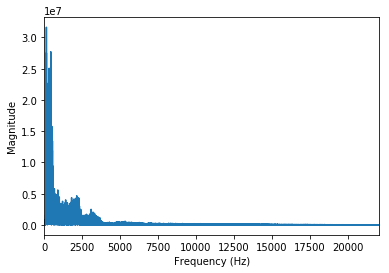

In [97]:
f_of_s = np.fft.rfft(wav)                   # Fourier transform of signal, keeping only the positive frequencies
freq = np.arange(f_of_s.size)*(Fs/2.)/f_of_s.size    # generate frequencies for plot

fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax.set_title('Magnitude of Fourier Transform of Signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xlim(0,22050)
plt.show()

### Is the trend of rapid decay something you expected to see? Why?

#### Your answer here: Yes rapid decay in FFT means smoothness

## <span style="color:blue">Exercise 3</span>

#### There are 3 subparts in this exercise

#### (a) Plot only the initial parts of the Fourier Transform and notice the spectrum pattern.

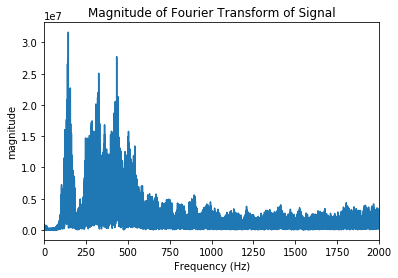

In [14]:
### Solution 

fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax.set_title('Magnitude of Fourier Transform of Signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('magnitude')
ax.set_xlim(1, 2000)
plt.show()

#### (b) Plot the *frequency* content of a
           1. rectangular window
           2. Hamming window
#### and give a brief description of the differences between these windows.

Tip: Be sure to normalize the windows so that they sum to 1

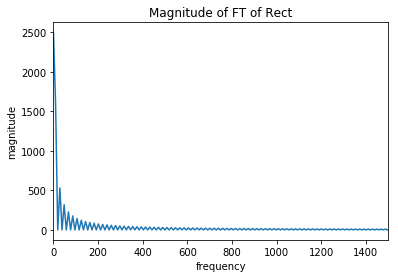

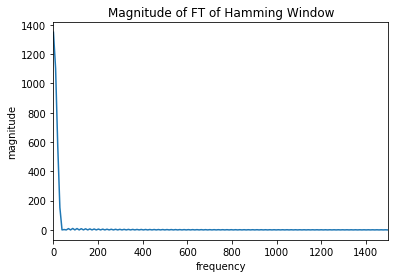

In [99]:
f_of_s = np.fft.rfft(np.concatenate((np.ones(2500),np.zeros(2500))))
freq = np.arange(f_of_s.size)*(Fs/2.)/f_of_s.size
fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax.set_title('Magnitude of FT of Rect')
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1500)
plt.show()

f_of_s = np.fft.rfft(np.concatenate((np.hamming(2500),np.zeros(2500))))
freq = np.arange(f_of_s.size)*(Fs/2.)/f_of_s.size
fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax.set_title('Magnitude of FT of Hamming Window')
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1500)
plt.show()

#### (c) Plot the *frequency* content of the signal using a
           1. rectangular window
           2. Hamming window.
#### by making use of the function getWindow defined previously. You might want to play with the scales on the axis to see better

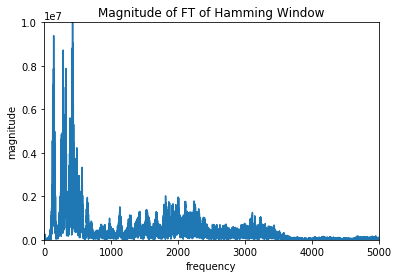

C:\Users\young\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


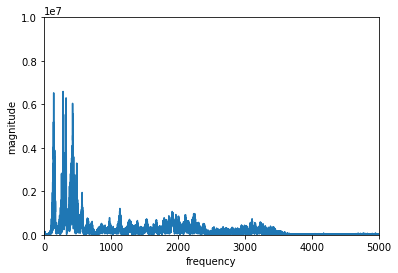

In [101]:
### Solution 

f_of_s = np.fft.rfft(getWindow(s, 0, 100000))
freq = np.arange(f_of_s.size)*(Fs/2.)/f_of_s.size
fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax.set_title('Magnitude of FT of Hamming Window')
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_ylim(0,10000000)
ax.set_xlim(0,5000)
plt.show()


f_of_s = np.fft.rfft(getWindow(s, 0, 100000, window_func='hamming'))
freq = np.arange(f_of_s.size)*(Fs/2.)/f_of_s.size
fig_fft = plt.figure()
ax = fig_fft.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot(freq, np.absolute(f_of_s))
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_ylim(0,10000000)
ax.set_xlim(0,5000)
plt.show()

## <span style="color:blue">Exercise 4</span> 

### Frequency Domain Visualization

Here we will utilize a built in function in matplotlib to plot the spectrogram of the audio signal. The spectrogram is computed from a overlapping sliding window of the audio signal, with the windowing function applied. This is typically called the Short Time Fourier Transform(STFT) of the audio signal. Each column in the plot represents a window of the signal, the y-axis represents the frequency and the color represents the magnitude.

Text(0.5,0,'time (in samples)')

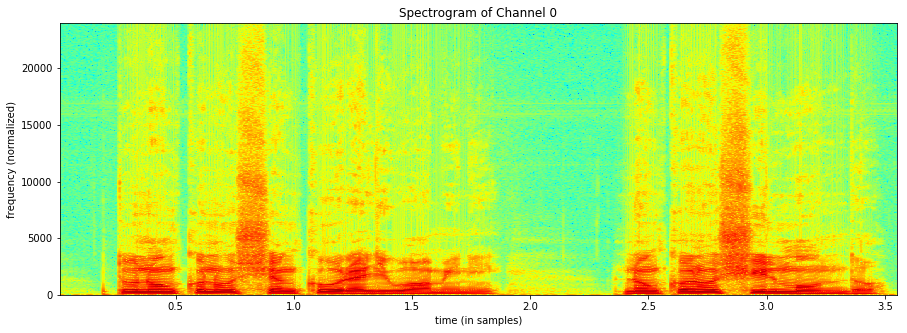

In [24]:
fig, (ax1) = plt.subplots(ncols=1) # create plot
fig.set_size_inches(15, 5)

N=1024
M=128

wav_segment = wav[240000:411000]

# generate & plot spectrogram (built-in function)
data, freqs, bins, im = ax1.specgram(wav_segment,Fs = Fs, NFFT=N, noverlap=(N-M), window = np.hamming(N), cmap = 'jet')   
ax1.axis('tight')
ax1.set_title('Spectrogram of Channel 0')
ax1.set_ylabel('frequency (normalized)')
ax1.set_xlabel('time (in samples)')

### Your Task:
Looking at the spectrograms above, are you able to guess the number of phrases/sentences in this speech? Describe briefly the reasons. (Feel free to verify your answer by listening to the provided wav file)

### Solution 
Your answer here:

In [25]:
Audio(wav_segment, rate=Fs)

# Part 2 - Digital Images

In this part, we will be looking at digital image representation

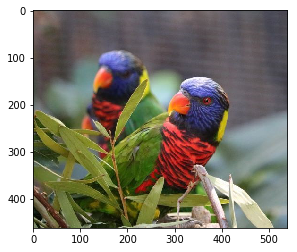

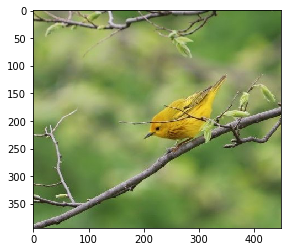

In [26]:
# Read in the image file and convert it into a numpy array
img = np.array(plt.imread('data/bird.jpg'))
img2 = np.array(plt.imread('data/bird2.jpg'))

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img2)
plt.show()

## <span style="color:blue">Exercise 5</span> 

Write code to do the following: 

1. Print the height and width of the image in pixels.

In [27]:
#### Solution 
print('height: ', img.shape[0])
print('width: ', img.shape[1])

height:  462
width:  540



2. Estimate the compression ratio of this JPEG image. 
    - Recall that an image is made of pixels and each pixel is about 3 bytes.
    - Estimate the size based on the height and width of the image
    - Obtain the actual size of the file from the system, or by using the *os* library
    - Obtain the compression ratio


In [28]:
#### Solution 

expected_size = (img.shape[0] * img.shape[1])*3
print('Expected size', expected_size)

real_size = os.path.getsize('data/bird.jpg')
print('Real size', real_size)

compression_ratio = (img.shape[0] * img.shape[1] * img.shape[2])/real_size
print('Compression ratio', compression_ratio)

Expected size 748440
Real size 66011
Compression ratio 11.338110314947508


3. Show the R, G, B channels seperately in a row
    - You can picking the different colors by picking different indices of the depth axis (using `img[:, :, 0]` for example).
    - In what order are the channels ordered along the depth dimension - R-G-B or B-G-R? Justify.


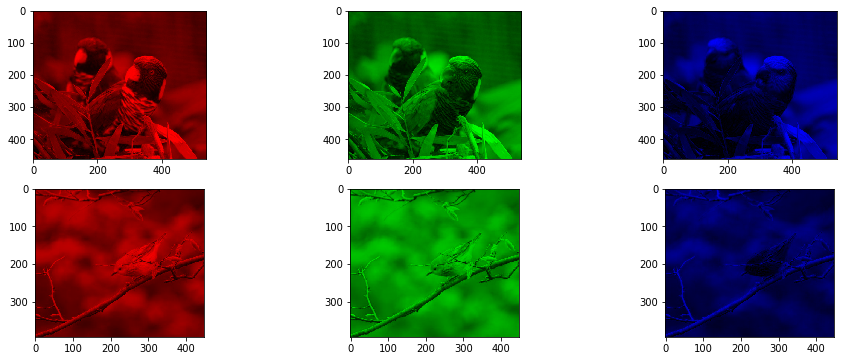

In [31]:
#### Solution 

plt.figure(figsize=(16,6))

plt.subplot(2,3,1)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,0] = img[:,:,0]
plt.imshow(one_channel)


plt.subplot(2,3,2)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,1] = img[:,:,1]
plt.imshow(one_channel)

plt.subplot(2,3,3)
one_channel = np.zeros_like(img, dtype="uint8")
one_channel[:,:,2] = img[:,:,2]
plt.imshow(one_channel)

plt.subplot(2,3,4)
one_channel = np.zeros_like(img2, dtype="uint8")
one_channel[:,:,0] = img2[:,:,0]
plt.imshow(one_channel)


plt.subplot(2,3,5)
one_channel = np.zeros_like(img2, dtype="uint8")
one_channel[:,:,1] = img2[:,:,1]
plt.imshow(one_channel)

plt.subplot(2,3,6)
one_channel = np.zeros_like(img2, dtype="uint8")
one_channel[:,:,2] = img2[:,:,2]
plt.imshow(one_channel)

Order for JPG image: [R G B]

4. Plot the histogram of each channel. 
    - You can use the `plt.hist()` function
    - Are the color well-balanced in this image? Contrast to the `bird2.jpg` file.


[]

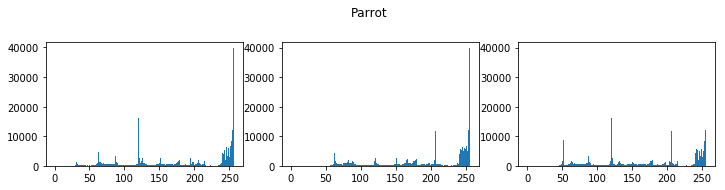

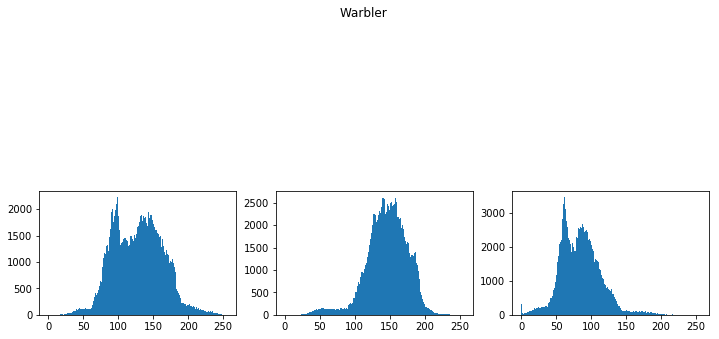

In [104]:
#### Solution 

plt.figure(figsize=(12,5))
plt.suptitle('Parrot')
plt.subplot(2,3,1)
plt.hist(img[:,:,0].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,2)
plt.hist(img[:,:,1].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,3)
plt.hist(img[:,:,2].ravel(), 256, [0,256])
plt.plot()

#### Solution 
plt.figure(figsize=(12,5))
plt.suptitle('Warbler')
plt.subplot(2,3,4)
plt.hist(img2[:,:,0].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,5)
plt.hist(img2[:,:,1].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,6)
plt.hist(img2[:,:,2].ravel(), 256, [0,256])
plt.plot()

Your comments: Histogram shows that it is focused in one area (not widespread) which means it is not well balanced

5. Take photos of a common daily object near you, in two different settings: indoors and outdoors. Plot the R, G, B channels and the histogram of each channel for both the images and comment on any differences you note. You will use these two photos in the later labs.

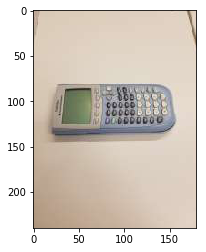

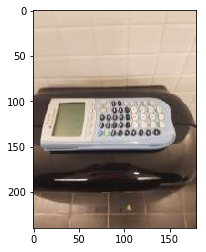

In [102]:
# Read in the image file and convert it into a numpy array
img3 = np.array(plt.imread('data/2.jpg'))
img4 = np.array(plt.imread('data/3.jpg'))

plt.figure()
plt.imshow(img3)
plt.figure()
plt.imshow(img4)
plt.show()

[]

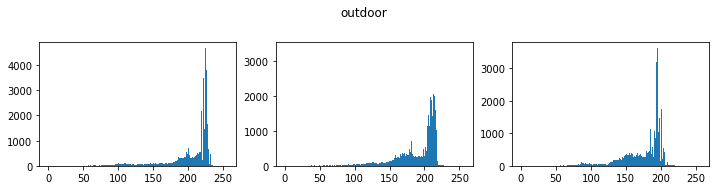

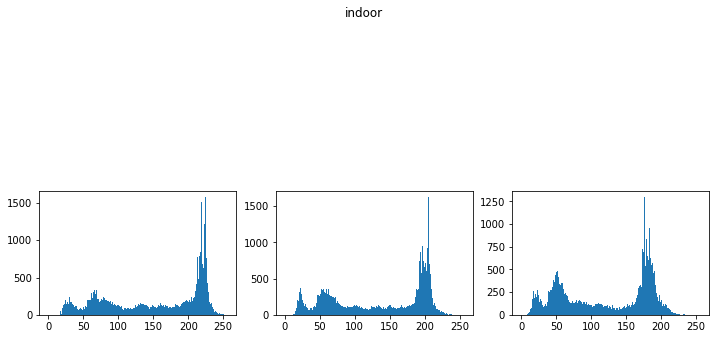

In [108]:
plt.figure(figsize=(12,5))
plt.suptitle('outdoor')
plt.subplot(2,3,1)
plt.hist(img3[:,:,0].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,2)
plt.hist(img3[:,:,1].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,3)
plt.hist(img3[:,:,2].ravel(), 256, [0,256])
plt.plot()

#### Solution 
plt.figure(figsize=(12,5))
plt.suptitle('indoor')
plt.subplot(2,3,4)
plt.hist(img4[:,:,0].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,5)
plt.hist(img4[:,:,1].ravel(), 256, [0,256])
plt.plot()


plt.subplot(2,3,6)
plt.hist(img4[:,:,2].ravel(), 256, [0,256])
plt.plot()

Your comments: Histogram outdoor has higher intensity

## <span style="color:blue">Exercise 6</span> 

1. Do you think that the tiles A and B are of different shades/intensities in the checkerboard below?


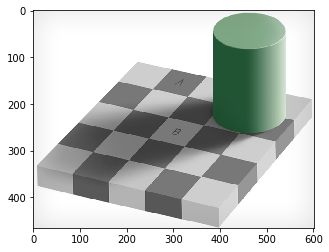

In [109]:
img = np.array(plt.imread('data/illusion.jpg'))
plt.imshow(img)

Your answer: No they are same.
    

2. Plot the intensity variation of the pixels along one vertical line. 
    - Pick an index in close to index 300 along the horizontal axis
    - Identify the regions corresponding to tile A and tile B.
    - Does the computer see different shades? Justify.

[]

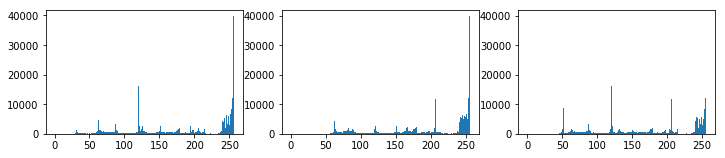

In [110]:
# Your code here
plt.figure(figsize=(12,5))
plt.subplot(2,3,1)
plt.hist(img[:,:,0].ravel(), 256, [0,256])
plt.plot()

plt.subplot(2,3,2)
plt.hist(img[:,:,1].ravel(), 256, [0,256])
plt.plot()

plt.subplot(2,3,3)
plt.hist(img[:,:,2].ravel(), 256, [0,256])
plt.plot()


Your answers here: They see similar shades
